1 获取重庆江北区二手房售价

In [10]:
from selenium import webdriver
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
import time
driver = webdriver.Edge()
ur1 = "https://cq.esf.fang.com/house-a057/"
driver.get(ur1)

# 用于收集数据
data = []

# 设置最大爬取的页数（20页）
for pagenum in range(20):
    print(f"正在抓取第 {pagenum + 1} 页")
    
    try:
        # 等待翻页按钮可点击
        WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CLASS_NAME, 'last')))
        find_next_page = driver.find_elements(By.CLASS_NAME, 'last')
        next_page = find_next_page[0]  # 选择第一个翻页按钮
    except Exception as e:
        print(f"翻页按钮找不到: {e}")
        break  # 如果翻页按钮找不到，退出循环
    
    # 等待价格信息加载
    WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'price_right')))
    
    # 找到所有价格信息
    price = driver.find_elements(By.CLASS_NAME, 'price_right')
    house_count = len(price)  # 该页房源数量
    print(f"当前页有 {house_count} 套房源")
    
    # 循环录入该页的价格信息
    for i in range(house_count):
        price_information = price[i].text.split('\n')  # 以换行符分割
        data.append(price_information)  # 将数据添加到数据集中
    
    # 点击翻页按钮
    next_page.click()
    


driver.quit()

# 将数据转换为 pandas DataFrame
df = pd.DataFrame(data)
print(df)

# 清洗数据
df[0] = df[0].str.replace('万', '').astype(float)  # 去掉“万”并转换为浮动型
df[1] = df[1].str.replace('元/㎡', '').astype(float)  # 去掉“元/㎡”并转换为浮动型

# 删除不需要的列
df.drop(columns=[2], inplace=True)

# 设置列名
df.columns = ['总价（万元）', '单价（元/㎡）']
print(df)

# 保存为 Excel 文件
df.to_excel("二手房售价_江北.xlsx", header=True, index=False)
print("数据保存完毕！")

正在抓取第 1 页
当前页有 60 套房源
正在抓取第 2 页
当前页有 60 套房源
正在抓取第 3 页
当前页有 60 套房源
正在抓取第 4 页
当前页有 60 套房源
正在抓取第 5 页
当前页有 60 套房源
正在抓取第 6 页
当前页有 60 套房源
正在抓取第 7 页
当前页有 60 套房源
正在抓取第 8 页
当前页有 60 套房源
正在抓取第 9 页
当前页有 60 套房源
正在抓取第 10 页
当前页有 60 套房源
正在抓取第 11 页
当前页有 60 套房源
正在抓取第 12 页
当前页有 60 套房源
正在抓取第 13 页
当前页有 60 套房源
正在抓取第 14 页
当前页有 60 套房源
正在抓取第 15 页
当前页有 60 套房源
正在抓取第 16 页
当前页有 60 套房源
正在抓取第 17 页
当前页有 60 套房源
正在抓取第 18 页
当前页有 60 套房源
正在抓取第 19 页
当前页有 60 套房源
正在抓取第 20 页
当前页有 60 套房源
           0         1         2
0       510万  20712元/㎡      None
1       188万  15867元/㎡  低于市场价59万
2       236万  16549元/㎡  低于市场价30万
3       364万  15283元/㎡      None
4       203万  15263元/㎡  低于市场价33万
...      ...       ...       ...
1195    206万  18188元/㎡  低于市场价20万
1196  170.9万  14490元/㎡  低于市场价21万
1197    198万  18679元/㎡      None
1198    365万  24786元/㎡      None
1199    126万  17816元/㎡  低于市场价13万

[1200 rows x 3 columns]
      总价（万元）  单价（元/㎡）
0      510.0  20712.0
1      188.0  15867.0
2      236.0  16549.0
3      364.0  15283.0
4      203.0  1526

2.获取重庆渝北区二手房租价

In [11]:
from selenium import webdriver
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
driver2 = webdriver.Edge()
ur2 = 'https://cq.zu.fang.com/house-a057/'
driver2.get(ur2)

# 用于收集数据
data1 = []
data2 = []

# 设置最大爬取的页数（11页）
for pagenum in range(11):
    print(f"正在抓取第 {pagenum + 1} 页")

    try:
        # 等待价格信息加载
        WebDriverWait(driver2, 10).until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'price')))
        rent_information = driver2.find_elements(By.CLASS_NAME, 'price')  # 总价
        rent_information2 = driver2.find_elements(By.CLASS_NAME, 'font15')  # 面积等信息
        Total_num = len(rent_information)
        print(f"当前页共有 {Total_num} 套房源")

        # 循环抓取该页的出租信息
        for i in range(Total_num):
            # 出租信息（合租类型、户型、面积等）
            data1.append(rent_information2[i].text.split('|'))
            # 出租价格
            data2.append(rent_information[i].text)
        
        # 等待并点击翻页按钮
        if pagenum < 10:  # 确保只翻 10页
            WebDriverWait(driver2, 10).until(EC.element_to_be_clickable((By.LINK_TEXT, "下一页")))
            next_page = driver2.find_element(By.LINK_TEXT, "下一页")
            next_page.click()
           
    except Exception as e:
        print(f"第 {pagenum + 1} 页出现问题: {e}")
        break  # 遇到异常时退出

# 将数据转换为 pandas DataFrame
df2 = pd.DataFrame(data1)
df2.insert(0, '总价格（元）', data2)  # 插入总价格列
print("数据抓取完成")

# 数据清洗
df2.columns = ['总价（元）', '合租类型', '户型', '面积（㎡）', '朝向']
df2['面积（㎡）'] = df2['面积（㎡）'].str.replace('㎡', '').astype(float)  # 去掉“㎡”并转换为浮动型
df2.drop(columns=['户型', '朝向', '合租类型'], inplace=True)  # 删除不需要的列

# 显示清洗后的数据
print(df2)

# 保存为 Excel 文件
df2.to_excel("二手房租价_江北.xlsx", header=True, index=False)
print("数据已保存至 '二手房租价_江北.xlsx'")
driver2.quit() 

正在抓取第 1 页
当前页共有 60 套房源
正在抓取第 2 页
当前页共有 60 套房源
正在抓取第 3 页
当前页共有 60 套房源
正在抓取第 4 页
当前页共有 60 套房源
正在抓取第 5 页
当前页共有 60 套房源
正在抓取第 6 页
当前页共有 60 套房源
正在抓取第 7 页
当前页共有 60 套房源
正在抓取第 8 页
当前页共有 60 套房源
正在抓取第 9 页
当前页共有 60 套房源
正在抓取第 10 页
当前页共有 60 套房源
正在抓取第 11 页
当前页共有 39 套房源
数据抓取完成
    总价（元）  面积（㎡）
0    4600  121.0
1    2700   53.0
2    2250   73.0
3    3888  101.0
4    4000  145.0
..    ...    ...
634  2900  110.0
635  1600   42.0
636  1500   45.0
637   800   20.0
638  1500   45.0

[639 rows x 2 columns]
数据已保存至 '二手房租价_江北.xlsx'


3.合并数据

In [27]:
import pandas as pd
sales_files = {
    "渝中": "二手房售价_渝中.xlsx",
    "渝北": "二手房售价_渝北.xlsx",
    "江北": "二手房售价_江北.xlsx",
    "南岸": "二手房售价_南岸.xlsx"
}

rental_files = {
    "渝中": "二手房租价_渝中.xlsx",
    "渝北": "二手房租价_渝北.xlsx",
    "江北": "二手房租价_江北.xlsx",
    "南岸": "二手房租价_南岸.xlsx"
}

# 合并二手房数据
sales_data = []
for district, file_path in sales_files.items():
    df = pd.read_excel(file_path)
    df["区域"] = district  # 添加区域列
    sales_data.append(df)

merged_sales = pd.concat(sales_data, ignore_index=True)
merged_sales.to_excel("重庆市合并二手房售价.xlsx", index=False)
print(f"合并二手房数据完成，共 {len(merged_sales)} 条记录")

# 合并租房数据
rental_data = []
for district, file_path in rental_files.items():
    df = pd.read_excel(file_path)
    df["区域"] = district  # 添加区域列
    rental_data.append(df)

merged_rentals = pd.concat(rental_data, ignore_index=True)
merged_rentals.to_excel("重庆市合并二手房租价.xlsx", index=False)
print(f"合并租房数据完成，共 {len(merged_rentals)} 条记录")


合并二手房数据完成，共 4800 条记录
合并租房数据完成，共 2579 条记录


4.描述性统计及异常值处理

剔除异常值后的二手房数据数量: 4332
剔除异常值后的租房数据数量: 2313
数据清理完成，已保存清理后的数据

 二手房售价 - 统计数据
             房价_万元        房价_元每平
count  4332.000000   4332.000000
mean    203.107996  14605.957525
std     104.512467   4266.259833
min      31.600000   5237.000000
25%     125.000000  11380.000000
50%     178.000000  14009.500000
75%     263.250000  17283.500000
max     570.000000  26923.000000

 租房价格 - 统计数据
            租金_元每月       租房面积_㎡
count  2313.000000  2313.000000
mean   2239.537397    72.774751
std    1403.333261    36.917785
min     399.000000     8.000000
25%    1200.000000    40.000000
50%    2000.000000    74.000000
75%    3000.000000    97.000000
max    6800.000000   185.000000


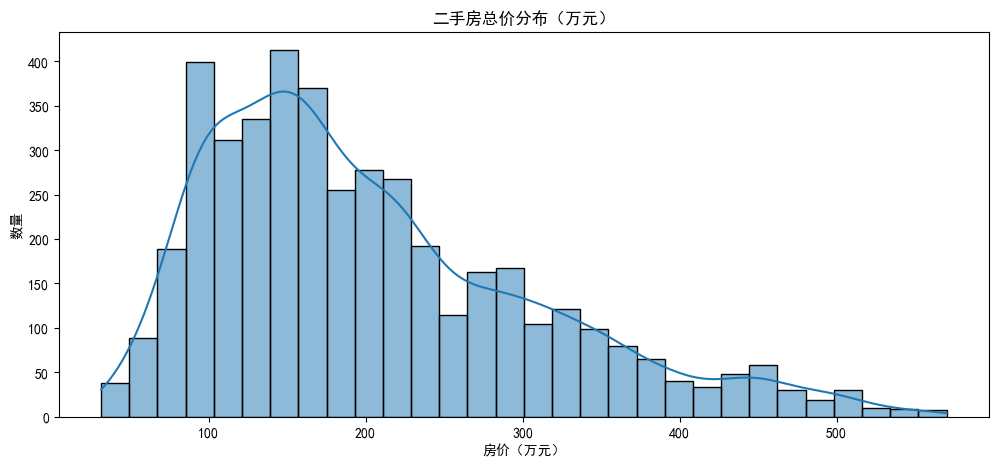

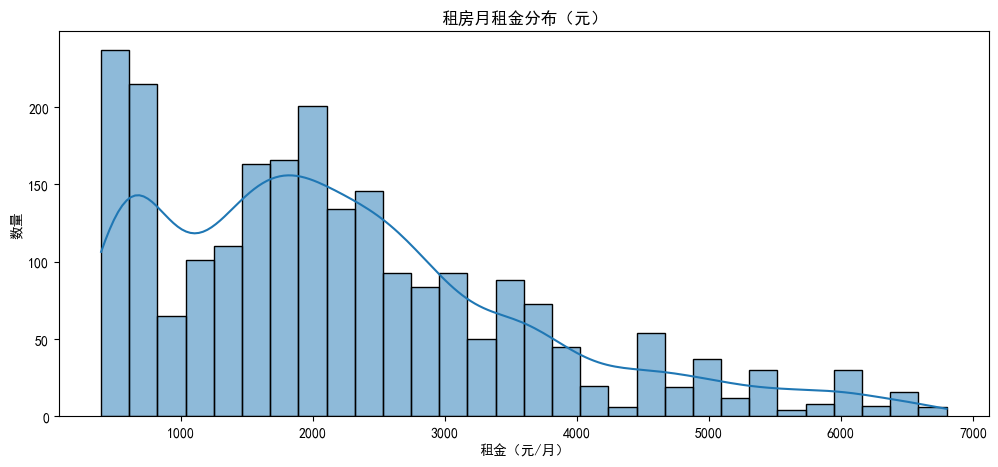

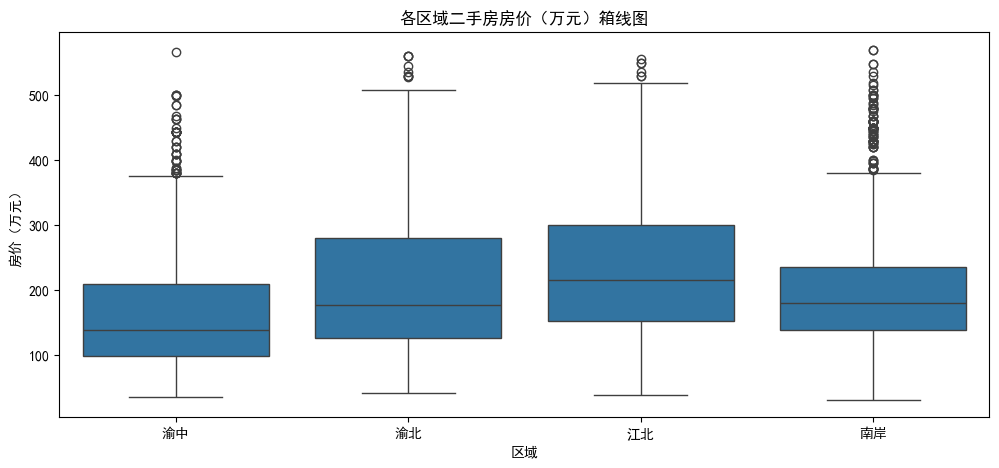

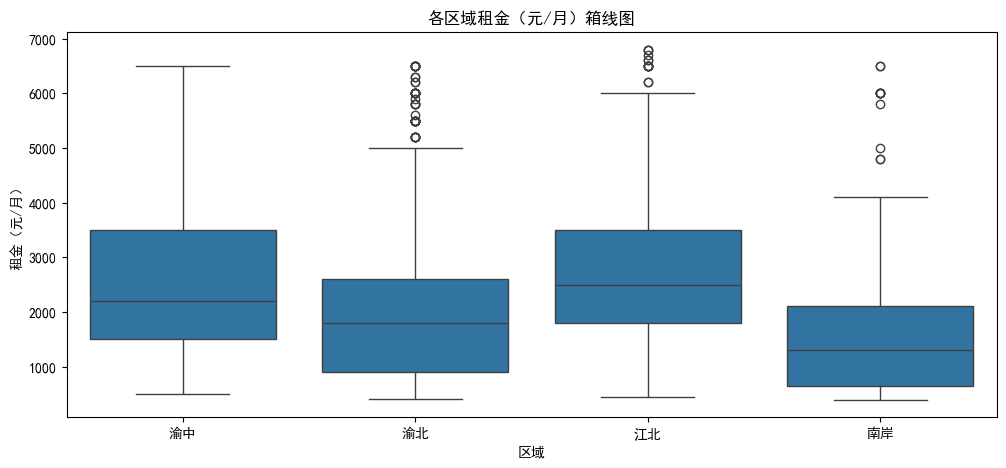

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


pd.set_option('mode.chained_assignment', None)

# 读取合并后的数据
merged_sales = pd.read_excel("重庆市合并二手房售价.xlsx")
merged_rentals = pd.read_excel("重庆市合并二手房租价.xlsx")

# 数据清理（去除缺失值 & 确保数值型数据）
merged_sales.rename(columns={"总价（万元）": "房价_万元", "单价（元/㎡）": "房价_元每平"}, inplace=True)
merged_rentals.rename(columns={"总价（元）": "租金_元每月", "面积（㎡）": "租房面积_㎡"}, inplace=True)

# 删除缺失值
merged_sales.dropna(inplace=True)
merged_rentals.dropna(inplace=True)

# 转换数据类型
merged_sales["房价_万元"] = pd.to_numeric(merged_sales["房价_万元"], errors="coerce")
merged_sales["房价_元每平"] = pd.to_numeric(merged_sales["房价_元每平"], errors="coerce")
merged_rentals["租金_元每月"] = pd.to_numeric(merged_rentals["租金_元每月"], errors="coerce")
merged_rentals["租房面积_㎡"] = pd.to_numeric(merged_rentals["租房面积_㎡"], errors="coerce")

# 处理异常值（使用IQR方法）
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

merged_sales = remove_outliers(merged_sales, "房价_万元")
merged_sales = remove_outliers(merged_sales, "房价_元每平")
merged_rentals = remove_outliers(merged_rentals, "租金_元每月")
merged_rentals = remove_outliers(merged_rentals, "租房面积_㎡")

#保存清理后的数据
merged_sales.to_excel("清理后二手房售价.xlsx", index=False)
merged_rentals.to_excel("清理后租房数据.xlsx", index=False)
print(f"剔除异常值后的二手房数据数量: {len(merged_sales)}")
print(f"剔除异常值后的租房数据数量: {len(merged_rentals)}")
print("数据清理完成，已保存清理后的数据")
# 计算描述性统计
print("\n 二手房售价 - 统计数据")
print(merged_sales.describe())

print("\n 租房价格 - 统计数据")
print(merged_rentals.describe())

# 绘制可视化图表
plt.figure(figsize=(12, 5))
sns.histplot(merged_sales["房价_万元"], bins=30, kde=True)
plt.title("二手房总价分布（万元）")
plt.xlabel("房价（万元）")
plt.ylabel("数量")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(merged_rentals["租金_元每月"], bins=30, kde=True)
plt.title("租房月租金分布（元）")
plt.xlabel("租金（元/月）")
plt.ylabel("数量")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x="区域", y="房价_万元", data=merged_sales)
plt.title("各区域二手房房价（万元）箱线图")
plt.xlabel("区域")
plt.ylabel("房价（万元）")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x="区域", y="租金_元每月", data=merged_rentals)
plt.title("各区域租金（元/月）箱线图")
plt.xlabel("区域")
plt.ylabel("租金（元/月）")
plt.show()

5.计算租金价格比及绘制柱状图

各区域房价租金比

区域
南岸   446.47
江北   514.89
渝中   388.32
渝北   533.58


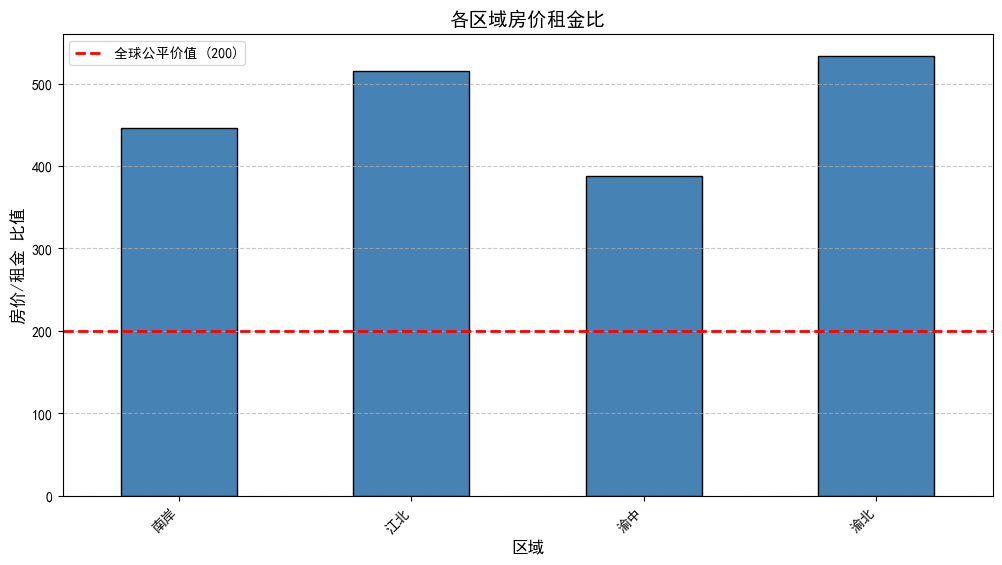

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt

# 读取清理后的数据
sales_data = pd.read_excel("清理后二手房售价.xlsx")
rentals_data = pd.read_excel("清理后租房数据.xlsx")

# 确保列名一致
sales_data.rename(columns={"房价_万元": "房价(万元)", "房价_元每平": "房价每平米"}, inplace=True)
rentals_data.rename(columns={"租金_元每月": "租金(元/月)", "租房面积_㎡": "租房面积"}, inplace=True)

# 计算每平方米租金（租金/㎡）
rentals_data["租金每平米"] = rentals_data["租金(元/月)"] / rentals_data["租房面积"]

# 计算每个街区的房价和租金中位数
sales_median = sales_data.groupby("区域")["房价每平米"].median()
rentals_median = rentals_data.groupby("区域")["租金每平米"].median()

# 计算房价与租金中位数比值
price_rent_ratio = sales_median / rentals_median

print("各区域房价租金比\n")
print(price_rent_ratio.to_string(float_format="%.2f"))

# 绘制柱状图（图A）
plt.figure(figsize=(12, 6))
price_rent_ratio.plot(kind="bar", color="steelblue", edgecolor="black")

# 添加基准线（全球公平价值 ≈ 200）
plt.axhline(y=200, color="red", linestyle="dashed", linewidth=2, label="全球公平价值 (200)")

# 图表美化
plt.title("各区域房价租金比", fontsize=14)
plt.xlabel("区域", fontsize=12)
plt.ylabel("房价/租金 比值", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
# 显示图表
plt.show()

6.测area=50/100的租售比

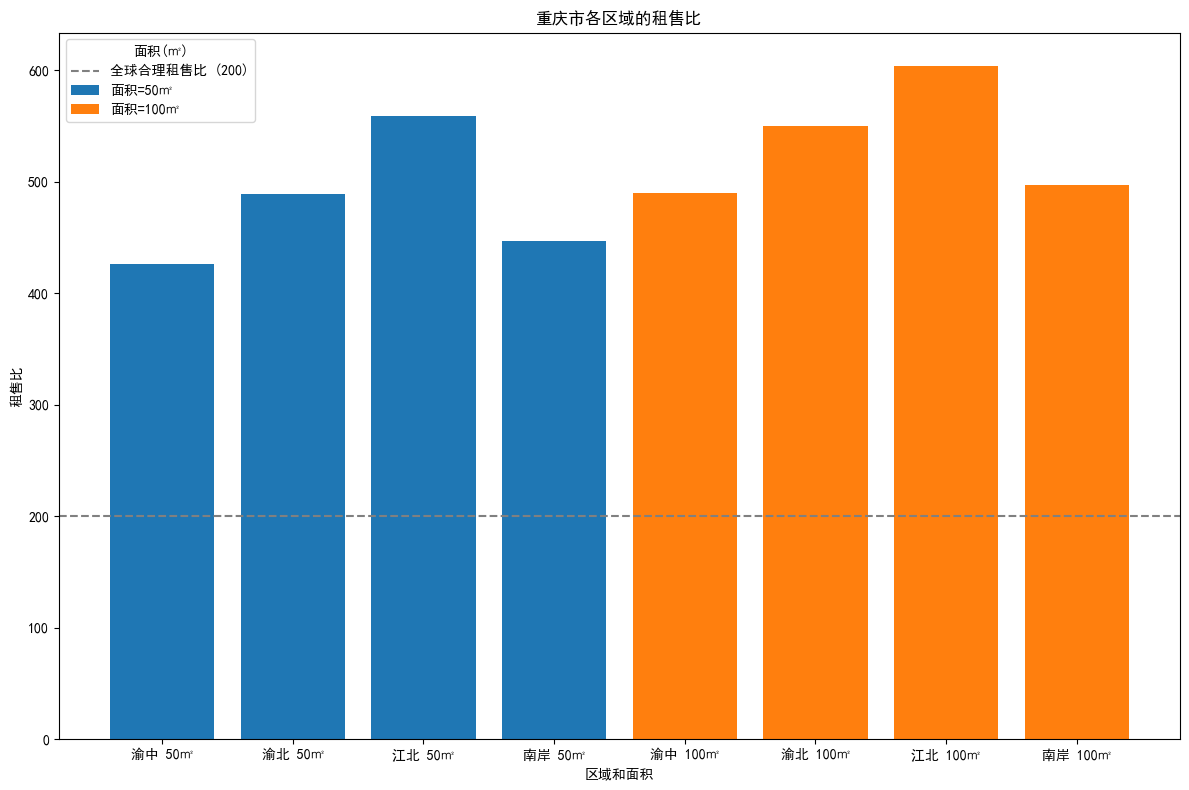

   区域  面积(㎡)     预测单价(元/㎡)  预测每平方米租金(元/㎡)         租售比
0  渝中     50   9913.990427      23.247951  426.445775
1  渝中    100  11498.018278      23.463016  490.048604
2  渝北     50  10832.803204      22.151768  489.026565
3  渝北    100  12290.909765      22.350447  549.917855
4  江北     50  12093.669384      21.633182  559.033321
5  江北    100  13179.213678      21.839620  603.454347
6  南岸     50   9700.029400      21.712952  446.739326
7  南岸    100  10880.619302      21.881831  497.244464


In [64]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 读取清洗后的数据
sales_data = pd.read_excel("清理后二手房售价.xlsx")  # 包含 "区域", "房价_万元"，"房价_元每平"
rentals_data = pd.read_excel("清理后租房数据.xlsx")  # 包含 "区域", "租金_元每月"，"租房面积_㎡"

# **街区列编码**
location_map = {"渝中": 1, "渝北": 2, "江北": 3, "南岸": 4}  
sales_data["location"] = sales_data["区域"].map(location_map)
rentals_data["location"] = rentals_data["区域"].map(location_map)

predicted_sales = []
predicted_rentals = []

# **针对每个街区拟合模型**
for location in location_map.values():
    # **筛选当前街区的数据**
    sales_data_location = sales_data[sales_data["location"] == location]
    rentals_data_location = rentals_data[rentals_data["location"] == location]

    # **定义并训练模型 1（二手房价格预测）**
    X_sales = sales_data_location[["房价_万元", "location"]].copy()  # 使用“房价_万元”作为预测变量
    X_sales["房价_万元 × location"] = X_sales["房价_万元"] * X_sales["location"]
    y_sales = sales_data_location["房价_元每平"]
    X_sales = sm.add_constant(X_sales)  # 添加常数项
    model1 = sm.OLS(y_sales, X_sales).fit()

    # **定义并训练模型 2（租金预测）**
    X_rentals = rentals_data_location[["租金_元每月", "location"]].copy()  # 使用“租金_元每月”作为预测变量
    X_rentals["租金_元每月 × location"] = X_rentals["租金_元每月"] * X_rentals["location"]
    y_rentals = rentals_data_location["租金_元每月"] / rentals_data_location["租房面积_㎡"]  # 每平方米租金
    X_rentals = sm.add_constant(X_rentals)  # 添加常数项
    model2 = sm.OLS(y_rentals, X_rentals).fit()

    # **预测不同面积（50㎡ 和 100㎡）的房价和租金**
    m2_values = [50, 100]

    for m2 in m2_values:
        # **预测二手房单价**
        X_new_sales = pd.DataFrame({
            "房价_万元": [m2],  # 假设房价/万元和面积成正比
            "location": [location],
            "房价_万元 × location": [m2 * location]
        })
        X_new_sales = sm.add_constant(X_new_sales)  # 添加常数项
        predicted_price = model1.predict(X_new_sales)[0]  # 预测单价(元/㎡)

        # **预测租金**
        X_new_rentals = pd.DataFrame({
            "租金_元每月": [m2],  # 假设租金/元每月和面积成正比
            "location": [location],
            "租金_元每月 × location": [m2 * location]
        })
        X_new_rentals = sm.add_constant(X_new_rentals)  # 添加常数项
        predicted_rent = model2.predict(X_new_rentals)[0]  # 预测每平方米租金(元/㎡)

        # **保存预测结果**
        predicted_sales.append(predicted_price)  # 保存单价（元/㎡）
        predicted_rentals.append(predicted_rent)  # 保存每平方米租金（元/㎡）

# **将预测结果保存到 DataFrame**
predictions = pd.DataFrame({
    "区域": [street for street in location_map.keys() for _ in m2_values],
    "面积(㎡)": m2_values * len(location_map),
    "预测单价(元/㎡)": predicted_sales,
    "预测每平方米租金(元/㎡)": predicted_rentals
})

# **计算租售比**
predictions["租售比"] = predictions["预测单价(元/㎡)"] / predictions["预测每平方米租金(元/㎡)"]

# **绘制柱状图**
plt.figure(figsize=(12, 8))  # 调整图形大小

# 绘制每个街区和面积的柱状图
for m2 in m2_values:
    data = predictions[predictions["面积(㎡)"] == m2]
    plt.bar(data["区域"] + " " + data["面积(㎡)"].astype(str) + "㎡", data["租售比"], label=f"面积={m2}㎡")

plt.axhline(y=200, color='gray', linestyle='--', label="全球合理租售比 (200)")
plt.xlabel("区域和面积")
plt.ylabel("租售比")
plt.title("重庆市各区域的租售比")
plt.legend(title="面积(㎡)")
plt.tight_layout()  # 自动调整布局
plt.show()

# **打印租售比结果**
print(predictions)
